# Pytorch tutorial

In this Pytorch tutorial, we will be exploring the features of pytorch for deep learning. We have used 2 of the most famous datsets- the MNIST datasetfor handwritten digits and the cats and dogs dataset which can be downloaded from [here](https://www.microsoft.com/en-us/download/details.aspx?id=54765). Make sure the dataset is downloaded in the same folder as this notebook for the code to work!

In [ ]:
import torch

In [2]:
import torchvision

In [3]:
from torchvision import datasets,transforms

In [4]:
train = datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [9]:
#Printing one batch to see the result

for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [11]:
x,y = data[0][0],data[1][0]

In [13]:
print(y)

tensor(8)


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

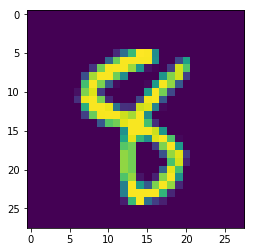

In [16]:
# The shape of x is [1,28,28] while plt.imshow expects (28,28)
# Thus, we use .view function to reshape the tensor
plt.imshow(x.view(28,28))
plt.show()

# Balancing

In [17]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

In [20]:
for data in trainset:
    Xs,ys=data
    for y in ys:
        counter_dict[int(y)]+=1
        total+=1
print(counter_dict)

{0: 11846, 1: 13484, 2: 11916, 3: 12262, 4: 11684, 5: 10842, 6: 11836, 7: 12530, 8: 11702, 9: 11898}


# Making the Neural Network

In [6]:
import torch.nn as nn
import torch.nn.functional as F


torch.nn is more like object oriented programming and 
ttorch.n.functional is more like fucntions

We mostly code in object oriented programming for torch but sometimes we just want to run a specific function and can use nn.functional

Generally, these 2 libraries are interchangeable,ie, if something exists in nn, it exists in nn.functional as well.

For nn, we will have to initialize stuff while for functional, we pass in as paramters of a functional.

We have defined the layers but we dont have any path for the data to take through these layers.

We want to make a simple neural network-ie a feed forward neural netwrok. Thus, the data passes in one direction.

In [7]:
class Net(nn.Module):
    #We inherit nn.Module
    def __init__(self):
        #Running the initialization for nn.Module
        super().__init__()
        
        # We define the fully connected layers of the neural network and in another 
        #method we define how data passes through
        
        #fc stands for fully connected
        
        #We pass in the flattened image (ie, from[28,28] to 28*28) as our input
        #Our target here is to make 3 layers of 64 neurons for hidden layers-output
        self.fc1=nn.Linear(28*28,64)
        #fc2 takes in 64 since the previous layer outputs 64
        #fc2 outputs 64 again
        self.fc2=nn.Linear(64,64)
        self.fc3=nn.Linear(64,64)
        #Our output layer only has 10 neurons to output, correspongind to the 10 classes
        self.fc4=nn.Linear(64,10)
        
    #Method to define how the data moves in our feed forward network
    def forward(self,x):
        
        #PyTorch is so beautiful!!
        # We say that x(our data) passes through layer 1 then layer 2 and so on
        
        #Our activation function will be relu
        #The activation function helps us decide if the neuron is firing
        #The activation function runs on the output data, not input
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        
        
        #With multi class data, softmax optimizer works
        #dim referse to the dimension to which we want to apply our softmax layer.
        #We can think of it to be similar to axes
        #Essentially, which dimension/column/axis do we want to sum to 1(ie, get Probability distribution of)
        return F.log_softmax(x,dim=1)
        

net=Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


## Passing data into our neural network.

In [8]:
X= torch.rand((28,28))

In [9]:
X

tensor([[3.1443e-02, 6.9303e-01, 6.8524e-02, 1.9401e-01, 7.0391e-01, 6.9127e-01,
         1.7729e-01, 7.6301e-01, 3.5718e-01, 7.8289e-01, 5.5996e-01, 9.2577e-01,
         7.0485e-01, 7.8604e-01, 8.2016e-01, 2.0593e-01, 9.2344e-01, 8.7437e-01,
         9.7165e-01, 4.6199e-01, 6.9554e-01, 6.3126e-01, 4.7350e-01, 6.7409e-01,
         9.5205e-01, 2.7348e-01, 8.5163e-01, 8.1058e-03],
        [4.3362e-01, 3.3779e-01, 8.7317e-01, 4.7787e-01, 6.5191e-01, 7.1776e-01,
         6.0200e-01, 1.9275e-01, 6.4586e-01, 3.6131e-01, 2.6379e-02, 5.1429e-01,
         8.4344e-01, 1.8369e-01, 2.8550e-01, 1.3422e-01, 1.2081e-01, 2.6809e-01,
         5.5527e-01, 1.2373e-01, 9.1506e-01, 9.6739e-01, 6.0182e-02, 5.9771e-02,
         3.8118e-01, 5.3836e-01, 3.8263e-01, 2.8613e-01],
        [5.8042e-01, 3.5925e-01, 2.0139e-01, 8.2115e-01, 8.0857e-01, 7.9164e-01,
         5.5703e-01, 3.7411e-01, 5.0635e-01, 7.9955e-02, 6.7565e-01, 5.4061e-02,
         2.8053e-01, 6.5538e-02, 1.4518e-01, 9.4302e-01, 1.4923e-01, 2.084

In [10]:
#Formatting our image data as our network wants it
#-1 signifies that the input will be an unknown shape
X=X.view(-1,28*28)

In [11]:
output = net(X)

In [12]:
output

tensor([[-2.3863, -2.4169, -2.1593, -2.3317, -2.3147, -2.1951, -2.2984, -2.2598,
         -2.2920, -2.4044]], grad_fn=<LogSoftmaxBackward>)

We made a model and got an output. Yayy!!

Now we look at how to pass in labeled data and train the model

In order to do that, we will talk about loss and optimizer.

loss- Measure of how wrong the model is. We want to minimize loss ideally

Optimizer-Its job is to optmize and adjust all of the possible/required weights so as to lower the loss. The rate at which this happens will depend upon the learning rate we use.

In [7]:
import torch.optim as optim

#net.parameter() refers to everything that is adjustable in our model.
#There might be layers that are not necessarily adjstable in our model. 


#Eg, Transfer Learning - Where we have a model with many layers and the initial layers are
# Very good at very basic image recognition and the later layers are responsible for very specific tasks
# IN such a case, we freeze the first few layers and only let the optimizer work on optimize the later layers

# The learning rate, in part, will dictate the size of the step our model takes 
# in reaching to the minima of our optimization curve
# If we have too large or too small a learning rate, we will be stuck 
# in a loop without making significant progress to reach the minima.
# Thus, we use a decaying learning rate which starts off with very big steps and becomes smaller over time


optimizer = optim.Adam(net.parameters(), lr=0.001)

# Keep in mind that we do not optmize for accuracy, we optimize for loss.
# It so happens that the accuracy follows

# Epoch signifies how many times we will be passing thorugh our whole dataset
EPOCHS=3

for epoch in range(EPOCHS):
    for data in trainset:
        # Data is a batch of featuresets and labels
        X,y= data
        
        # Everytime before passing our data, we want to 0 our gradient so that they dont get added
        net.zero_grad()
        output=net(X.view(-1,28*28))
        
        # We use nll loss since our data is a scalar value, not a one hot vector
        # If our data was a one hot vector, we would use mse
        loss=F.nll_loss(output,y)
        
        # Backpropagation
        #PyTorch is AMAZING
        loss.backward()
        
        # Adjusting the weights
        optimizer.step()
    print(loss)

NameError: name 'net' is not defined

In [15]:
correct=0
total=0

# Doing something without gradients
# This is because we dont want out model to optimize 
# its weights based on the Test data

# Historically, we used net.train() and net.eval() to show whether we were training or testing and so on

# model.train()" and "model.eval()" activates and deactivates Dropout and BatchNorm, so it is quite important. 
# "with torch.no_grad()" only deactivates gradient calculations, but doesn't turn off Dropout and BatchNorm. 
# Your model accuracy will therefore be lower if you don't use model.eval() when evaluating the model.

# However, we still use no_grad cuz why not
with torch.no_grad():
    for data in trainset:
        X,y=data
        output= net(X.view(-1,28*28))
        
        for idx,i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
            
print("Accuracy :",round(correct/total,3))
        
    

Accuracy : 0.973


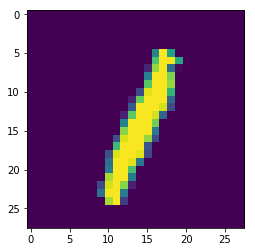

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X[2].view(28,28))

In [21]:
print(torch.argmax(net(X[2].view(-1,28*28))[0]))

tensor(1)


### We are done with our basic neural network!! Cheers ;)

# Convolutional Neural Networks

Traditionally, we use CNN for image tasks. But recently, CNN appear to be outperforming RNN in terms of sequential types of data.

The way the neural network works is: We pass in the image(eg, of a Dog) into the network *Without* Flattening it.ie, A CNN Accepts a 2D input. It can also accept 3D input (So we can make 3d printing models etc too!)

Since an image is nothing but a grid of pixels, We apply what is called a 'Convolution' to the image. We use a kernel to slide through the pixels. The Goal of convolution is to locate features in an image. Thus, if we have a 3-by-3 kernel sliding over the iage, it will look at a grid of 3x3 pixels and try to extract features of those 3x3 pixels.

Thus, the first layer of convolution might find things like edges and curves ad corners. The next layer might find more complex features like circles,squares etc.

In terms of numbers, the kernel produces a scalaer for every grid it slides over. Thus, it basically condenses the image.

After our convolution, we will end up with a condensed 2D vector,ie, a condensed image.

Next, we will be doing what is called *Pooling*. Pooling also has a kernel. The most common form of pooling is max pooling Where inside each grid the kernel slides over, it takes the maximum value.

Thus, What the convolutional neural network is doing is drastically condensing our image and looking for just the features of the image.

We will be having many such layers which will keep finding more and more complex features of the image

In [8]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False # Set once to true and then to false unless we want to rebuild our dataset

Sometimes preprocessing data can take a ery long time so we want to run it as few times as possible.

We will be having classes since for most image data, we will want to do steps which are common while preprocessing.

Thus, it can be convenient to call methods of classes.

In [23]:
class DogsVSCats():
    # We will change our image to have size 50x50
    IMG_SIZE=50
    CATS="PetImages/Cat"
    DOGS="PetImages/Dog"
    LABELS={CATS:0,DOGS:1}
    
    training_data=[]
    #THE MOST IMPORTANT PART OF DL IS BALANCE
    catcount=0
    dogcount=0
    
    def make_training_data(self):
        for label in self.LABELS:
            # Iterating over all the images in the directory
            for f in tqdm(os.listdir(label)):
                try:
                    #f will be the file name. We want the full path
                    path = os.path.join(label,f)

                    # We can have colour channels as well but I dont think colours are relevant in
                    # Determining cats vs dogs so its useless to process that data
                    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)

                    # Resizing image
                    img =cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))

                    # We will append the anp array of the image pixels and the class as a one hot vector.
                    # We use np.eye to make our one hot vectors
                    self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])


                    # The count will help us decide if the data is balanced or whether we need to throw away some data
                    if label == self.CATS:
                        self.catcount+=1
                    elif label==self.DOGS:
                        self.dogcount+=1
                        
                        
                except Exception as e:
                    # Exception occurs when the image cannot be loaded or there are resizing issues
                    pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Cats:",self.catcount)
        print("Dogs",self.dogcount)
    

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:54<00:00, 230.50it/s]


Cats: 12476
Dogs 12470


In [9]:
training_data=np.load("training_data.npy",allow_pickle=True)

In [7]:
len(training_data)

24946

In [8]:
training_data[0]

array([array([[ 36, 194, 186, ..., 197, 202, 204],
       [ 32, 175, 185, ..., 201, 203, 207],
       [ 21, 165, 186, ..., 203, 206, 208],
       ...,
       [118, 164, 151, ..., 142, 135, 145],
       [134, 153, 144, ..., 156, 152, 153],
       [168, 143, 145, ..., 182, 174, 168]], dtype=uint8),
       array([1., 0.])], dtype=object)

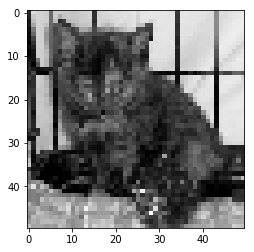

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(training_data[0][0],cmap='gray')

Now that we have preprocessed our data and made our processing class, we want to take batches of the data, pass it into the CNN, optimize the CNN and get an output.

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Making our layers- We will have 3 conv layers
        
        #Input is 1, output is 32 and we have a 5 by 5 kernel
        self.conv1 = nn.Conv2d(1,32,5)
        self.conv2 = nn.Conv2d(32,64,5)
        self.conv3 = nn.Conv2d(64,128,5)
        
        # At some point, this neurla network needs to have one Linear layer
        # ie,It has to eventually output to one linear layer that would be the distribution of predictions
        # In this case, we will have a 2 node linear layer, since we have 2 classes- Cats and Dogs
        
        # Flattening our layer to give linear output
        # We can ALSO use torch.flatten()
        
        # We can just have whatever image that flows in to be -1,1,50,50
        x=torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        
        #We call self.convs to do a quick forward pass to see the din=mensions of the data
        # After it is output from the convolutional layer
        # So that we can flatten it
        self.convs(x)
        
        # To figure out what the number needs to be to the fully connected layer,we need to run 
        # Through the convolutional layers to get the shape of the output
        
        
        self.fc1 = nn.Linear(self._to_linear,512)
        self.fc2 = nn.Linear(512,2)
        
    def convs(self,x):
        # We will only runthe data through the convolutional layers to get the
        # Shape of the oitput
        
        # We will have a 2,2 pooling
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x=F.max_pool2d(F.relu(self.conv3(x)),(2,2))
        print(x[0].shape)
        
        #Run this once to get the shape of the data output from the conv layer
        if self._to_linear is None:
            self._to_linear=x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    
    def forward(self,x):
        x=self.convs(x)
        #After x comes out of convs, it is not flatened.
        # Thus, we need to flatten it
        x=x.view(-1,self._to_linear)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        
        return F.softmax(x,dim=1)
    
net=Net()

torch.Size([128, 2, 2])


In [13]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

loss_function = nn.MSELoss()

X=torch.tensor([i[0]for i in training_data]).view(-1,50,50)
X=X/255.0
y=torch.tensor([i[1]for i in training_data])

VAL_PCT=0.1
val_size=int(len(X)*VAL_PCT)
print(val_size)

2494


In [14]:
train_X=X[:-val_size]
train_y=y[:-val_size]

test_X=X[-val_size:]
test_y=y[-val_size:] 

In [15]:
# If there are memory errors for any DL code, be it this one or any other, the easiest thing to fix it is to change batch size!!!!!
# Next, if the model doesnt run min 8 batch size, move on to tweak the layer size and number of layers
BATCH_SIZE=100
EPOCHS=1

for epoch in range(EPOCHS):
    for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
        batch_X=train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
        batch_y=train_y[i:i+BATCH_SIZE]
        
        #Changing our gradients to zero each time
        #There are 2 ways to do this:
        # optimizer.zero_grad()
        # net.zero_grad()
        
        # As long as all of the parameters are being called by the optimizer,ie, net.params(),
        # There is no difference between using optim or net to 0 our gradients
        
        # We might have models which is build with 2 different neural netwokrs with different optimizers 
        # which come together to build one big model, which for eg use 2 different optimizers: optimizer1 and optimizer2
        # if thats the case, we want to use the specific network in question, and use optimizer1.zero_grad(), which will not affect optimizer2
        
        net.zero_grad()
        outputs=net(batch_X)
        loss=loss_function(outputs.double(),batch_y)
        
        loss.backward()
        optimizer.step()
        
        
print(loss)  



  0%|                                                                                          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])


  0%|▎                                                                                 | 1/225 [00:00<02:31,  1.48it/s]

torch.Size([128, 2, 2])


  1%|▋                                                                                 | 2/225 [00:01<02:23,  1.56it/s]

torch.Size([128, 2, 2])


  1%|█                                                                                 | 3/225 [00:01<02:17,  1.61it/s]

torch.Size([128, 2, 2])


  2%|█▍                                                                                | 4/225 [00:02<02:12,  1.67it/s]

torch.Size([128, 2, 2])


  2%|█▊                                                                                | 5/225 [00:02<02:08,  1.72it/s]

torch.Size([128, 2, 2])


  3%|██▏                                                                               | 6/225 [00:03<02:07,  1.72it/s]

torch.Size([128, 2, 2])


  3%|██▌                                                                               | 7/225 [00:04<02:11,  1.65it/s]

torch.Size([128, 2, 2])


  4%|██▉                                                                               | 8/225 [00:04<02:14,  1.61it/s]

torch.Size([128, 2, 2])


  4%|███▎                                                                              | 9/225 [00:05<02:16,  1.58it/s]

torch.Size([128, 2, 2])


  4%|███▌                                                                             | 10/225 [00:06<02:13,  1.62it/s]

torch.Size([128, 2, 2])


  5%|███▉                                                                             | 11/225 [00:06<02:12,  1.62it/s]

torch.Size([128, 2, 2])


  5%|████▎                                                                            | 12/225 [00:07<02:06,  1.68it/s]

torch.Size([128, 2, 2])


  6%|████▋                                                                            | 13/225 [00:07<02:02,  1.73it/s]

torch.Size([128, 2, 2])


  6%|█████                                                                            | 14/225 [00:08<02:01,  1.74it/s]

torch.Size([128, 2, 2])


  7%|█████▍                                                                           | 15/225 [00:08<01:59,  1.75it/s]

torch.Size([128, 2, 2])


  7%|█████▊                                                                           | 16/225 [00:09<01:56,  1.80it/s]

torch.Size([128, 2, 2])


  8%|██████                                                                           | 17/225 [00:09<01:55,  1.80it/s]

torch.Size([128, 2, 2])


  8%|██████▍                                                                          | 18/225 [00:10<01:55,  1.79it/s]

torch.Size([128, 2, 2])


  8%|██████▊                                                                          | 19/225 [00:11<01:52,  1.82it/s]

torch.Size([128, 2, 2])


  9%|███████▏                                                                         | 20/225 [00:11<01:50,  1.85it/s]

torch.Size([128, 2, 2])


  9%|███████▌                                                                         | 21/225 [00:12<01:50,  1.85it/s]

torch.Size([128, 2, 2])


 10%|███████▉                                                                         | 22/225 [00:12<01:49,  1.85it/s]

torch.Size([128, 2, 2])


 10%|████████▎                                                                        | 23/225 [00:13<01:48,  1.86it/s]

torch.Size([128, 2, 2])


 11%|████████▋                                                                        | 24/225 [00:13<01:46,  1.89it/s]

torch.Size([128, 2, 2])


 11%|█████████                                                                        | 25/225 [00:14<01:45,  1.90it/s]

torch.Size([128, 2, 2])


 12%|█████████▎                                                                       | 26/225 [00:14<01:47,  1.86it/s]

torch.Size([128, 2, 2])


 12%|█████████▋                                                                       | 27/225 [00:15<01:46,  1.86it/s]

torch.Size([128, 2, 2])


 12%|██████████                                                                       | 28/225 [00:15<01:45,  1.87it/s]

torch.Size([128, 2, 2])


 13%|██████████▍                                                                      | 29/225 [00:16<01:44,  1.87it/s]

torch.Size([128, 2, 2])


 13%|██████████▊                                                                      | 30/225 [00:16<01:43,  1.88it/s]

torch.Size([128, 2, 2])


 14%|███████████▏                                                                     | 31/225 [00:17<01:43,  1.88it/s]

torch.Size([128, 2, 2])


 14%|███████████▌                                                                     | 32/225 [00:17<01:42,  1.89it/s]

torch.Size([128, 2, 2])


 15%|███████████▉                                                                     | 33/225 [00:18<01:44,  1.83it/s]

torch.Size([128, 2, 2])


 15%|████████████▏                                                                    | 34/225 [00:19<01:43,  1.85it/s]

torch.Size([128, 2, 2])


 16%|████████████▌                                                                    | 35/225 [00:19<01:42,  1.85it/s]

torch.Size([128, 2, 2])


 16%|████████████▉                                                                    | 36/225 [00:20<01:41,  1.86it/s]

torch.Size([128, 2, 2])


 16%|█████████████▎                                                                   | 37/225 [00:20<01:41,  1.85it/s]

torch.Size([128, 2, 2])


 17%|█████████████▋                                                                   | 38/225 [00:21<01:39,  1.87it/s]

torch.Size([128, 2, 2])


 17%|██████████████                                                                   | 39/225 [00:21<01:40,  1.86it/s]

torch.Size([128, 2, 2])


 18%|██████████████▍                                                                  | 40/225 [00:22<01:38,  1.87it/s]

torch.Size([128, 2, 2])


 18%|██████████████▊                                                                  | 41/225 [00:22<01:41,  1.81it/s]

torch.Size([128, 2, 2])


 19%|███████████████                                                                  | 42/225 [00:23<01:46,  1.72it/s]

torch.Size([128, 2, 2])


 19%|███████████████▍                                                                 | 43/225 [00:24<01:43,  1.76it/s]

torch.Size([128, 2, 2])


 20%|███████████████▊                                                                 | 44/225 [00:24<01:44,  1.72it/s]

torch.Size([128, 2, 2])


 20%|████████████████▏                                                                | 45/225 [00:25<01:45,  1.70it/s]

torch.Size([128, 2, 2])


 20%|████████████████▌                                                                | 46/225 [00:25<01:44,  1.72it/s]

torch.Size([128, 2, 2])


 21%|████████████████▉                                                                | 47/225 [00:26<01:42,  1.73it/s]

torch.Size([128, 2, 2])


 21%|█████████████████▎                                                               | 48/225 [00:26<01:42,  1.73it/s]

torch.Size([128, 2, 2])


 22%|█████████████████▋                                                               | 49/225 [00:27<01:40,  1.75it/s]

torch.Size([128, 2, 2])


 22%|██████████████████                                                               | 50/225 [00:28<01:40,  1.74it/s]

torch.Size([128, 2, 2])


 23%|██████████████████▎                                                              | 51/225 [00:28<01:40,  1.73it/s]

torch.Size([128, 2, 2])


 23%|██████████████████▋                                                              | 52/225 [00:29<01:39,  1.73it/s]

torch.Size([128, 2, 2])


 24%|███████████████████                                                              | 53/225 [00:29<01:38,  1.74it/s]

torch.Size([128, 2, 2])


 24%|███████████████████▍                                                             | 54/225 [00:30<01:38,  1.73it/s]

torch.Size([128, 2, 2])


 24%|███████████████████▊                                                             | 55/225 [00:31<01:38,  1.73it/s]

torch.Size([128, 2, 2])


 25%|████████████████████▏                                                            | 56/225 [00:31<01:38,  1.71it/s]

torch.Size([128, 2, 2])


 25%|████████████████████▌                                                            | 57/225 [00:32<01:37,  1.72it/s]

torch.Size([128, 2, 2])


 26%|████████████████████▉                                                            | 58/225 [00:32<01:37,  1.71it/s]

torch.Size([128, 2, 2])


 26%|█████████████████████▏                                                           | 59/225 [00:33<01:39,  1.66it/s]

torch.Size([128, 2, 2])


 27%|█████████████████████▌                                                           | 60/225 [00:34<01:41,  1.63it/s]

torch.Size([128, 2, 2])


 27%|█████████████████████▉                                                           | 61/225 [00:34<01:40,  1.64it/s]

torch.Size([128, 2, 2])


 28%|██████████████████████▎                                                          | 62/225 [00:35<01:37,  1.68it/s]

torch.Size([128, 2, 2])


 28%|██████████████████████▋                                                          | 63/225 [00:35<01:37,  1.67it/s]

torch.Size([128, 2, 2])


 28%|███████████████████████                                                          | 64/225 [00:36<01:35,  1.69it/s]

torch.Size([128, 2, 2])


 29%|███████████████████████▍                                                         | 65/225 [00:37<01:35,  1.68it/s]

torch.Size([128, 2, 2])


 29%|███████████████████████▊                                                         | 66/225 [00:37<01:32,  1.72it/s]

torch.Size([128, 2, 2])


 30%|████████████████████████                                                         | 67/225 [00:38<01:31,  1.72it/s]

torch.Size([128, 2, 2])


 30%|████████████████████████▍                                                        | 68/225 [00:38<01:30,  1.74it/s]

torch.Size([128, 2, 2])


 31%|████████████████████████▊                                                        | 69/225 [00:39<01:29,  1.73it/s]

torch.Size([128, 2, 2])


 31%|█████████████████████████▏                                                       | 70/225 [00:39<01:28,  1.75it/s]

torch.Size([128, 2, 2])


 32%|█████████████████████████▌                                                       | 71/225 [00:40<01:33,  1.65it/s]

torch.Size([128, 2, 2])


 32%|█████████████████████████▉                                                       | 72/225 [00:41<01:38,  1.55it/s]

torch.Size([128, 2, 2])


 32%|██████████████████████████▎                                                      | 73/225 [00:41<01:41,  1.50it/s]

torch.Size([128, 2, 2])


 33%|██████████████████████████▋                                                      | 74/225 [00:42<01:41,  1.49it/s]

torch.Size([128, 2, 2])


 33%|███████████████████████████                                                      | 75/225 [00:43<01:41,  1.48it/s]

torch.Size([128, 2, 2])


 34%|███████████████████████████▎                                                     | 76/225 [00:43<01:37,  1.53it/s]

torch.Size([128, 2, 2])


 34%|███████████████████████████▋                                                     | 77/225 [00:44<01:38,  1.50it/s]

torch.Size([128, 2, 2])


 35%|████████████████████████████                                                     | 78/225 [00:45<01:34,  1.56it/s]

torch.Size([128, 2, 2])


 35%|████████████████████████████▍                                                    | 79/225 [00:45<01:32,  1.58it/s]

torch.Size([128, 2, 2])


 36%|████████████████████████████▊                                                    | 80/225 [00:46<01:28,  1.63it/s]

torch.Size([128, 2, 2])


 36%|█████████████████████████████▏                                                   | 81/225 [00:47<01:27,  1.65it/s]

torch.Size([128, 2, 2])


 36%|█████████████████████████████▌                                                   | 82/225 [00:47<01:25,  1.68it/s]

torch.Size([128, 2, 2])


 37%|█████████████████████████████▉                                                   | 83/225 [00:48<01:26,  1.64it/s]

torch.Size([128, 2, 2])


 37%|██████████████████████████████▏                                                  | 84/225 [00:48<01:29,  1.58it/s]

torch.Size([128, 2, 2])


 38%|██████████████████████████████▌                                                  | 85/225 [00:49<01:26,  1.62it/s]

torch.Size([128, 2, 2])


 38%|██████████████████████████████▉                                                  | 86/225 [00:50<01:26,  1.61it/s]

torch.Size([128, 2, 2])


 39%|███████████████████████████████▎                                                 | 87/225 [00:50<01:22,  1.66it/s]

torch.Size([128, 2, 2])


 39%|███████████████████████████████▋                                                 | 88/225 [00:51<01:22,  1.65it/s]

torch.Size([128, 2, 2])


 40%|████████████████████████████████                                                 | 89/225 [00:51<01:24,  1.61it/s]

torch.Size([128, 2, 2])


 40%|████████████████████████████████▍                                                | 90/225 [00:52<01:22,  1.63it/s]

torch.Size([128, 2, 2])


 40%|████████████████████████████████▊                                                | 91/225 [00:53<01:23,  1.60it/s]

torch.Size([128, 2, 2])


 41%|█████████████████████████████████                                                | 92/225 [00:54<01:34,  1.41it/s]

torch.Size([128, 2, 2])


 41%|█████████████████████████████████▍                                               | 93/225 [00:54<01:31,  1.44it/s]

torch.Size([128, 2, 2])


 42%|█████████████████████████████████▊                                               | 94/225 [00:55<01:29,  1.47it/s]

torch.Size([128, 2, 2])


 42%|██████████████████████████████████▏                                              | 95/225 [00:56<01:26,  1.50it/s]

torch.Size([128, 2, 2])


 43%|██████████████████████████████████▌                                              | 96/225 [00:56<01:23,  1.54it/s]

torch.Size([128, 2, 2])


 43%|██████████████████████████████████▉                                              | 97/225 [00:57<01:19,  1.61it/s]

torch.Size([128, 2, 2])


 44%|███████████████████████████████████▎                                             | 98/225 [00:57<01:17,  1.63it/s]

torch.Size([128, 2, 2])


 44%|███████████████████████████████████▋                                             | 99/225 [00:58<01:15,  1.67it/s]

torch.Size([128, 2, 2])


 44%|███████████████████████████████████▌                                            | 100/225 [00:58<01:14,  1.68it/s]

torch.Size([128, 2, 2])


 45%|███████████████████████████████████▉                                            | 101/225 [00:59<01:12,  1.71it/s]

torch.Size([128, 2, 2])


 45%|████████████████████████████████████▎                                           | 102/225 [01:00<01:11,  1.72it/s]

torch.Size([128, 2, 2])


 46%|████████████████████████████████████▌                                           | 103/225 [01:00<01:11,  1.70it/s]

torch.Size([128, 2, 2])


 46%|████████████████████████████████████▉                                           | 104/225 [01:01<01:10,  1.72it/s]

torch.Size([128, 2, 2])


 47%|█████████████████████████████████████▎                                          | 105/225 [01:01<01:10,  1.71it/s]

torch.Size([128, 2, 2])


 47%|█████████████████████████████████████▋                                          | 106/225 [01:02<01:09,  1.72it/s]

torch.Size([128, 2, 2])


 48%|██████████████████████████████████████                                          | 107/225 [01:03<01:09,  1.69it/s]

torch.Size([128, 2, 2])


 48%|██████████████████████████████████████▍                                         | 108/225 [01:03<01:09,  1.68it/s]

torch.Size([128, 2, 2])


 48%|██████████████████████████████████████▊                                         | 109/225 [01:04<01:12,  1.60it/s]

torch.Size([128, 2, 2])


 49%|███████████████████████████████████████                                         | 110/225 [01:04<01:11,  1.61it/s]

torch.Size([128, 2, 2])


 49%|███████████████████████████████████████▍                                        | 111/225 [01:05<01:09,  1.63it/s]

torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▊                                        | 112/225 [01:06<01:09,  1.62it/s]

torch.Size([128, 2, 2])


 50%|████████████████████████████████████████▏                                       | 113/225 [01:06<01:09,  1.62it/s]

torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▌                                       | 114/225 [01:07<01:09,  1.59it/s]

torch.Size([128, 2, 2])


 51%|████████████████████████████████████████▉                                       | 115/225 [01:08<01:07,  1.62it/s]

torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▏                                      | 116/225 [01:08<01:06,  1.64it/s]

torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▌                                      | 117/225 [01:09<01:05,  1.66it/s]

torch.Size([128, 2, 2])


 52%|█████████████████████████████████████████▉                                      | 118/225 [01:09<01:04,  1.66it/s]

torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████▎                                     | 119/225 [01:10<01:02,  1.68it/s]

torch.Size([128, 2, 2])


 53%|██████████████████████████████████████████▋                                     | 120/225 [01:10<01:02,  1.67it/s]

torch.Size([128, 2, 2])


 54%|███████████████████████████████████████████                                     | 121/225 [01:11<01:02,  1.67it/s]

torch.Size([128, 2, 2])


 54%|███████████████████████████████████████████▍                                    | 122/225 [01:12<01:01,  1.68it/s]

torch.Size([128, 2, 2])


 55%|███████████████████████████████████████████▋                                    | 123/225 [01:12<01:00,  1.68it/s]

torch.Size([128, 2, 2])


 55%|████████████████████████████████████████████                                    | 124/225 [01:13<00:59,  1.71it/s]

torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▍                                   | 125/225 [01:13<01:00,  1.66it/s]

torch.Size([128, 2, 2])


 56%|████████████████████████████████████████████▊                                   | 126/225 [01:14<00:59,  1.65it/s]

torch.Size([128, 2, 2])


 56%|█████████████████████████████████████████████▏                                  | 127/225 [01:15<01:01,  1.60it/s]

torch.Size([128, 2, 2])


 57%|█████████████████████████████████████████████▌                                  | 128/225 [01:15<00:59,  1.62it/s]

torch.Size([128, 2, 2])


 57%|█████████████████████████████████████████████▊                                  | 129/225 [01:16<00:59,  1.62it/s]

torch.Size([128, 2, 2])


 58%|██████████████████████████████████████████████▏                                 | 130/225 [01:17<00:58,  1.62it/s]

torch.Size([128, 2, 2])


 58%|██████████████████████████████████████████████▌                                 | 131/225 [01:17<00:56,  1.66it/s]

torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▉                                 | 132/225 [01:18<00:57,  1.63it/s]

torch.Size([128, 2, 2])


 59%|███████████████████████████████████████████████▎                                | 133/225 [01:18<00:56,  1.63it/s]

torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████▋                                | 134/225 [01:19<00:56,  1.61it/s]

torch.Size([128, 2, 2])


 60%|████████████████████████████████████████████████                                | 135/225 [01:20<00:55,  1.63it/s]

torch.Size([128, 2, 2])


 60%|████████████████████████████████████████████████▎                               | 136/225 [01:20<00:53,  1.65it/s]

torch.Size([128, 2, 2])


 61%|████████████████████████████████████████████████▋                               | 137/225 [01:21<00:52,  1.67it/s]

torch.Size([128, 2, 2])


 61%|█████████████████████████████████████████████████                               | 138/225 [01:21<00:52,  1.67it/s]

torch.Size([128, 2, 2])


 62%|█████████████████████████████████████████████████▍                              | 139/225 [01:22<00:52,  1.64it/s]

torch.Size([128, 2, 2])


 62%|█████████████████████████████████████████████████▊                              | 140/225 [01:23<00:51,  1.65it/s]

torch.Size([128, 2, 2])


 63%|██████████████████████████████████████████████████▏                             | 141/225 [01:23<00:51,  1.65it/s]

torch.Size([128, 2, 2])


 63%|██████████████████████████████████████████████████▍                             | 142/225 [01:24<00:49,  1.66it/s]

torch.Size([128, 2, 2])


 64%|██████████████████████████████████████████████████▊                             | 143/225 [01:24<00:49,  1.64it/s]

torch.Size([128, 2, 2])


 64%|███████████████████████████████████████████████████▏                            | 144/225 [01:25<00:48,  1.67it/s]

torch.Size([128, 2, 2])


 64%|███████████████████████████████████████████████████▌                            | 145/225 [01:26<00:47,  1.68it/s]

torch.Size([128, 2, 2])


 65%|███████████████████████████████████████████████████▉                            | 146/225 [01:26<00:46,  1.71it/s]

torch.Size([128, 2, 2])


 65%|████████████████████████████████████████████████████▎                           | 147/225 [01:27<00:45,  1.71it/s]

torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████▌                           | 148/225 [01:27<00:44,  1.74it/s]

torch.Size([128, 2, 2])


 66%|████████████████████████████████████████████████████▉                           | 149/225 [01:28<00:44,  1.71it/s]

torch.Size([128, 2, 2])


 67%|█████████████████████████████████████████████████████▎                          | 150/225 [01:29<00:43,  1.71it/s]

torch.Size([128, 2, 2])


 67%|█████████████████████████████████████████████████████▋                          | 151/225 [01:29<00:42,  1.72it/s]

torch.Size([128, 2, 2])


 68%|██████████████████████████████████████████████████████                          | 152/225 [01:30<00:43,  1.67it/s]

torch.Size([128, 2, 2])


 68%|██████████████████████████████████████████████████████▍                         | 153/225 [01:30<00:42,  1.68it/s]

torch.Size([128, 2, 2])


 68%|██████████████████████████████████████████████████████▊                         | 154/225 [01:31<00:43,  1.63it/s]

torch.Size([128, 2, 2])


 69%|███████████████████████████████████████████████████████                         | 155/225 [01:32<00:42,  1.65it/s]

torch.Size([128, 2, 2])


 69%|███████████████████████████████████████████████████████▍                        | 156/225 [01:32<00:41,  1.67it/s]

torch.Size([128, 2, 2])


 70%|███████████████████████████████████████████████████████▊                        | 157/225 [01:33<00:39,  1.71it/s]

torch.Size([128, 2, 2])


 70%|████████████████████████████████████████████████████████▏                       | 158/225 [01:33<00:39,  1.72it/s]

torch.Size([128, 2, 2])


 71%|████████████████████████████████████████████████████████▌                       | 159/225 [01:34<00:37,  1.75it/s]

torch.Size([128, 2, 2])


 71%|████████████████████████████████████████████████████████▉                       | 160/225 [01:34<00:39,  1.67it/s]

torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▏                      | 161/225 [01:35<00:39,  1.62it/s]

torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▌                      | 162/225 [01:36<00:38,  1.66it/s]

torch.Size([128, 2, 2])


 72%|█████████████████████████████████████████████████████████▉                      | 163/225 [01:36<00:37,  1.67it/s]

torch.Size([128, 2, 2])


 73%|██████████████████████████████████████████████████████████▎                     | 164/225 [01:37<00:36,  1.69it/s]

torch.Size([128, 2, 2])


 73%|██████████████████████████████████████████████████████████▋                     | 165/225 [01:37<00:35,  1.70it/s]

torch.Size([128, 2, 2])


 74%|███████████████████████████████████████████████████████████                     | 166/225 [01:38<00:34,  1.73it/s]

torch.Size([128, 2, 2])


 74%|███████████████████████████████████████████████████████████▍                    | 167/225 [01:39<00:34,  1.70it/s]

torch.Size([128, 2, 2])


 75%|███████████████████████████████████████████████████████████▋                    | 168/225 [01:39<00:34,  1.67it/s]

torch.Size([128, 2, 2])


 75%|████████████████████████████████████████████████████████████                    | 169/225 [01:40<00:33,  1.67it/s]

torch.Size([128, 2, 2])


 76%|████████████████████████████████████████████████████████████▍                   | 170/225 [01:41<00:34,  1.61it/s]

torch.Size([128, 2, 2])


 76%|████████████████████████████████████████████████████████████▊                   | 171/225 [01:41<00:32,  1.64it/s]

torch.Size([128, 2, 2])


 76%|█████████████████████████████████████████████████████████████▏                  | 172/225 [01:42<00:32,  1.61it/s]

torch.Size([128, 2, 2])


 77%|█████████████████████████████████████████████████████████████▌                  | 173/225 [01:42<00:32,  1.62it/s]

torch.Size([128, 2, 2])


 77%|█████████████████████████████████████████████████████████████▊                  | 174/225 [01:43<00:31,  1.61it/s]

torch.Size([128, 2, 2])


 78%|██████████████████████████████████████████████████████████████▏                 | 175/225 [01:44<00:30,  1.63it/s]

torch.Size([128, 2, 2])


 78%|██████████████████████████████████████████████████████████████▌                 | 176/225 [01:44<00:30,  1.63it/s]

torch.Size([128, 2, 2])


 79%|██████████████████████████████████████████████████████████████▉                 | 177/225 [01:45<00:30,  1.57it/s]

torch.Size([128, 2, 2])


 79%|███████████████████████████████████████████████████████████████▎                | 178/225 [01:46<00:29,  1.57it/s]

torch.Size([128, 2, 2])


 80%|███████████████████████████████████████████████████████████████▋                | 179/225 [01:46<00:28,  1.59it/s]

torch.Size([128, 2, 2])


 80%|████████████████████████████████████████████████████████████████                | 180/225 [01:47<00:28,  1.60it/s]

torch.Size([128, 2, 2])


 80%|████████████████████████████████████████████████████████████████▎               | 181/225 [01:47<00:26,  1.64it/s]

torch.Size([128, 2, 2])


 81%|████████████████████████████████████████████████████████████████▋               | 182/225 [01:48<00:26,  1.65it/s]

torch.Size([128, 2, 2])


 81%|█████████████████████████████████████████████████████████████████               | 183/225 [01:49<00:25,  1.64it/s]

torch.Size([128, 2, 2])


 82%|█████████████████████████████████████████████████████████████████▍              | 184/225 [01:49<00:25,  1.58it/s]

torch.Size([128, 2, 2])


 82%|█████████████████████████████████████████████████████████████████▊              | 185/225 [01:50<00:25,  1.57it/s]

torch.Size([128, 2, 2])


 83%|██████████████████████████████████████████████████████████████████▏             | 186/225 [01:51<00:25,  1.54it/s]

torch.Size([128, 2, 2])


 83%|██████████████████████████████████████████████████████████████████▍             | 187/225 [01:51<00:24,  1.57it/s]

torch.Size([128, 2, 2])


 84%|██████████████████████████████████████████████████████████████████▊             | 188/225 [01:52<00:22,  1.62it/s]

torch.Size([128, 2, 2])


 84%|███████████████████████████████████████████████████████████████████▏            | 189/225 [01:52<00:21,  1.66it/s]

torch.Size([128, 2, 2])


 84%|███████████████████████████████████████████████████████████████████▌            | 190/225 [01:53<00:21,  1.66it/s]

torch.Size([128, 2, 2])


 85%|███████████████████████████████████████████████████████████████████▉            | 191/225 [01:54<00:21,  1.61it/s]

torch.Size([128, 2, 2])


 85%|████████████████████████████████████████████████████████████████████▎           | 192/225 [01:54<00:20,  1.61it/s]

torch.Size([128, 2, 2])


 86%|████████████████████████████████████████████████████████████████████▌           | 193/225 [01:55<00:19,  1.62it/s]

torch.Size([128, 2, 2])


 86%|████████████████████████████████████████████████████████████████████▉           | 194/225 [01:55<00:18,  1.65it/s]

torch.Size([128, 2, 2])


 87%|█████████████████████████████████████████████████████████████████████▎          | 195/225 [01:56<00:18,  1.65it/s]

torch.Size([128, 2, 2])


 87%|█████████████████████████████████████████████████████████████████████▋          | 196/225 [01:57<00:17,  1.67it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████          | 197/225 [01:57<00:17,  1.64it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████▍         | 198/225 [01:58<00:17,  1.56it/s]

torch.Size([128, 2, 2])


 88%|██████████████████████████████████████████████████████████████████████▊         | 199/225 [01:59<00:16,  1.59it/s]

torch.Size([128, 2, 2])


 89%|███████████████████████████████████████████████████████████████████████         | 200/225 [01:59<00:15,  1.58it/s]

torch.Size([128, 2, 2])


 89%|███████████████████████████████████████████████████████████████████████▍        | 201/225 [02:00<00:14,  1.62it/s]

torch.Size([128, 2, 2])


 90%|███████████████████████████████████████████████████████████████████████▊        | 202/225 [02:00<00:14,  1.63it/s]

torch.Size([128, 2, 2])


 90%|████████████████████████████████████████████████████████████████████████▏       | 203/225 [02:01<00:13,  1.64it/s]

torch.Size([128, 2, 2])


 91%|████████████████████████████████████████████████████████████████████████▌       | 204/225 [02:02<00:12,  1.62it/s]

torch.Size([128, 2, 2])


 91%|████████████████████████████████████████████████████████████████████████▉       | 205/225 [02:02<00:12,  1.63it/s]

torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▏      | 206/225 [02:03<00:12,  1.48it/s]

torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▌      | 207/225 [02:04<00:11,  1.53it/s]

torch.Size([128, 2, 2])


 92%|█████████████████████████████████████████████████████████████████████████▉      | 208/225 [02:04<00:10,  1.61it/s]

torch.Size([128, 2, 2])


 93%|██████████████████████████████████████████████████████████████████████████▎     | 209/225 [02:05<00:09,  1.61it/s]

torch.Size([128, 2, 2])


 93%|██████████████████████████████████████████████████████████████████████████▋     | 210/225 [02:05<00:09,  1.65it/s]

torch.Size([128, 2, 2])


 94%|███████████████████████████████████████████████████████████████████████████     | 211/225 [02:06<00:08,  1.69it/s]

torch.Size([128, 2, 2])


 94%|███████████████████████████████████████████████████████████████████████████▍    | 212/225 [02:07<00:07,  1.65it/s]

torch.Size([128, 2, 2])


 95%|███████████████████████████████████████████████████████████████████████████▋    | 213/225 [02:07<00:07,  1.58it/s]

torch.Size([128, 2, 2])


 95%|████████████████████████████████████████████████████████████████████████████    | 214/225 [02:08<00:06,  1.61it/s]

torch.Size([128, 2, 2])


 96%|████████████████████████████████████████████████████████████████████████████▍   | 215/225 [02:08<00:06,  1.66it/s]

torch.Size([128, 2, 2])


 96%|████████████████████████████████████████████████████████████████████████████▊   | 216/225 [02:09<00:05,  1.64it/s]

torch.Size([128, 2, 2])


 96%|█████████████████████████████████████████████████████████████████████████████▏  | 217/225 [02:10<00:04,  1.68it/s]

torch.Size([128, 2, 2])


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 218/225 [02:10<00:04,  1.71it/s]

torch.Size([128, 2, 2])


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 219/225 [02:11<00:03,  1.69it/s]

torch.Size([128, 2, 2])


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 220/225 [02:11<00:02,  1.68it/s]

torch.Size([128, 2, 2])


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 221/225 [02:12<00:02,  1.62it/s]

torch.Size([128, 2, 2])


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 222/225 [02:13<00:01,  1.62it/s]

torch.Size([128, 2, 2])


 99%|███████████████████████████████████████████████████████████████████████████████▎| 223/225 [02:13<00:01,  1.55it/s]

torch.Size([128, 2, 2])


100%|███████████████████████████████████████████████████████████████████████████████▋| 224/225 [02:14<00:00,  1.53it/s]

torch.Size([128, 2, 2])


100%|████████████████████████████████████████████████████████████████████████████████| 225/225 [02:14<00:00,  1.71it/s]


tensor(0.2182, dtype=torch.float64, grad_fn=<MseLossBackward>)


In [17]:
correct = 0
total=0

with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class=torch.argmax(test_y[i])
        net_out=net(test_X[i].view(-1,1,50,50))[0]
        predicted_class=torch.argmax(net_out)
        if(predicted_class==real_class):
            correct+=1
        total+=1
        
print('Accuracy: ',round(correct/total,3))

  0%|                                                                                         | 0/2494 [00:00<?, ?it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  0%|▎                                                                                | 9/2494 [00:00<00:30, 82.04it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  1%|▌                                                                               | 17/2494 [00:00<00:30, 81.23it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  1%|▊                                                                               | 25/2494 [00:00<00:31, 78.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  1%|█                                                                               | 33/2494 [00:00<00:31, 78.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▎                                                                              | 41/2494 [00:00<00:32, 75.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▌                                                                              | 48/2494 [00:00<00:34, 71.85it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▊                                                                              | 55/2494 [00:00<00:35, 69.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▉                                                                              | 62/2494 [00:00<00:35, 67.59it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  3%|██▏                                                                             | 69/2494 [00:00<00:39, 61.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  3%|██▍                                                                             | 76/2494 [00:01<00:38, 62.30it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  3%|██▋                                                                             | 84/2494 [00:01<00:37, 64.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  4%|██▉                                                                             | 91/2494 [00:01<00:36, 65.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  4%|███▏                                                                            | 98/2494 [00:01<00:36, 64.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  4%|███▎                                                                           | 106/2494 [00:01<00:35, 68.18it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|███▌                                                                           | 114/2494 [00:01<00:33, 71.20it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|███▊                                                                           | 122/2494 [00:01<00:33, 70.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|████                                                                           | 130/2494 [00:01<00:32, 72.50it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  6%|████▎                                                                          | 138/2494 [00:01<00:32, 72.43it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  6%|████▌                                                                          | 146/2494 [00:02<00:33, 69.37it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  6%|████▊                                                                          | 153/2494 [00:02<00:35, 65.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  6%|█████                                                                          | 160/2494 [00:02<00:35, 65.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  7%|█████▎                                                                         | 168/2494 [00:02<00:33, 68.43it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  7%|█████▌                                                                         | 175/2494 [00:02<00:33, 68.75it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  7%|█████▊                                                                         | 182/2494 [00:02<00:35, 64.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  8%|█████▉                                                                         | 189/2494 [00:02<00:35, 64.12it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  8%|██████▏                                                                        | 196/2494 [00:02<00:35, 65.46it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  8%|██████▍                                                                        | 204/2494 [00:02<00:34, 67.19it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  8%|██████▋                                                                        | 211/2494 [00:03<00:35, 63.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  9%|██████▉                                                                        | 218/2494 [00:03<00:37, 60.14it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  9%|███████▏                                                                       | 226/2494 [00:03<00:35, 63.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  9%|███████▍                                                                       | 234/2494 [00:03<00:34, 65.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 10%|███████▋                                                                       | 241/2494 [00:03<00:35, 64.04it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 10%|███████▊                                                                       | 248/2494 [00:03<00:35, 63.11it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 10%|████████                                                                       | 255/2494 [00:03<00:36, 61.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 11%|████████▎                                                                      | 262/2494 [00:03<00:36, 60.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 11%|████████▌                                                                      | 269/2494 [00:04<00:35, 62.13it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 11%|████████▋                                                                      | 276/2494 [00:04<00:35, 62.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 11%|████████▉                                                                      | 283/2494 [00:04<00:39, 55.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 12%|█████████▏                                                                     | 289/2494 [00:04<00:40, 54.66it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 12%|█████████▎                                                                     | 295/2494 [00:04<00:39, 55.43it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 12%|█████████▌                                                                     | 303/2494 [00:04<00:36, 59.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 12%|█████████▊                                                                     | 310/2494 [00:04<00:35, 62.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 13%|██████████                                                                     | 318/2494 [00:04<00:33, 64.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 13%|██████████▎                                                                    | 325/2494 [00:04<00:33, 64.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 13%|██████████▌                                                                    | 332/2494 [00:05<00:33, 63.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 14%|██████████▊                                                                    | 340/2494 [00:05<00:32, 65.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 14%|███████████                                                                    | 348/2494 [00:05<00:31, 67.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 14%|███████████▏                                                                   | 355/2494 [00:05<00:32, 65.89it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|███████████▍                                                                   | 363/2494 [00:05<00:31, 68.73it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|███████████▋                                                                   | 370/2494 [00:05<00:30, 68.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|███████████▉                                                                   | 378/2494 [00:05<00:30, 69.19it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|████████████▏                                                                  | 385/2494 [00:05<00:30, 68.87it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|████████████▍                                                                  | 392/2494 [00:05<00:31, 65.76it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|████████████▋                                                                  | 399/2494 [00:06<00:32, 64.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|████████████▉                                                                  | 407/2494 [00:06<00:31, 67.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 17%|█████████████▏                                                                 | 415/2494 [00:06<00:30, 69.03it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 17%|█████████████▍                                                                 | 423/2494 [00:06<00:30, 68.89it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 17%|█████████████▌                                                                 | 430/2494 [00:06<00:31, 65.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 18%|█████████████▊                                                                 | 438/2494 [00:06<00:30, 67.35it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 18%|██████████████▏                                                                | 446/2494 [00:06<00:29, 69.47it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 18%|██████████████▍                                                                | 454/2494 [00:06<00:30, 67.11it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 19%|██████████████▋                                                                | 462/2494 [00:06<00:29, 68.75it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 19%|██████████████▉                                                                | 470/2494 [00:07<00:28, 70.88it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 19%|███████████████▏                                                               | 479/2494 [00:07<00:27, 73.71it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|███████████████▍                                                               | 487/2494 [00:07<00:27, 71.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|███████████████▋                                                               | 495/2494 [00:07<00:27, 73.45it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|███████████████▉                                                               | 503/2494 [00:07<00:27, 73.09it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|████████████████▏                                                              | 511/2494 [00:07<00:27, 71.48it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 21%|████████████████▍                                                              | 520/2494 [00:07<00:26, 73.80it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 21%|████████████████▋                                                              | 528/2494 [00:07<00:27, 72.15it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 21%|████████████████▉                                                              | 536/2494 [00:07<00:26, 72.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 22%|█████████████████▎                                                             | 545/2494 [00:08<00:25, 75.14it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 22%|█████████████████▌                                                             | 554/2494 [00:08<00:24, 77.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 23%|█████████████████▊                                                             | 562/2494 [00:08<00:24, 77.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 23%|██████████████████                                                             | 570/2494 [00:08<00:25, 75.58it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 23%|██████████████████▎                                                            | 578/2494 [00:08<00:26, 71.75it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 23%|██████████████████▌                                                            | 586/2494 [00:08<00:27, 69.48it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|██████████████████▊                                                            | 594/2494 [00:08<00:26, 71.80it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|███████████████████                                                            | 602/2494 [00:08<00:25, 73.32it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|███████████████████▎                                                           | 610/2494 [00:08<00:25, 74.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 25%|███████████████████▌                                                           | 618/2494 [00:09<00:25, 73.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 25%|███████████████████▊                                                           | 626/2494 [00:09<00:25, 74.08it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 25%|████████████████████                                                           | 634/2494 [00:09<00:25, 74.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 26%|████████████████████▎                                                          | 642/2494 [00:09<00:25, 72.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 26%|████████████████████▌                                                          | 650/2494 [00:09<00:25, 73.03it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 26%|████████████████████▊                                                          | 659/2494 [00:09<00:24, 74.39it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 27%|█████████████████████▏                                                         | 667/2494 [00:09<00:26, 69.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 27%|█████████████████████▍                                                         | 675/2494 [00:09<00:25, 71.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 27%|█████████████████████▋                                                         | 683/2494 [00:09<00:25, 71.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 28%|█████████████████████▉                                                         | 691/2494 [00:10<00:25, 69.48it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 28%|██████████████████████▏                                                        | 699/2494 [00:10<00:25, 70.48it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 28%|██████████████████████▍                                                        | 707/2494 [00:10<00:25, 71.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 29%|██████████████████████▋                                                        | 716/2494 [00:10<00:24, 73.02it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 29%|██████████████████████▉                                                        | 724/2494 [00:10<00:25, 70.67it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 29%|███████████████████████▏                                                       | 732/2494 [00:10<00:25, 70.21it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 30%|███████████████████████▍                                                       | 740/2494 [00:10<00:27, 63.57it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 30%|███████████████████████▋                                                       | 748/2494 [00:10<00:26, 66.28it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 30%|███████████████████████▉                                                       | 756/2494 [00:11<00:25, 68.32it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 31%|████████████████████████▏                                                      | 763/2494 [00:11<00:25, 68.66it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 31%|████████████████████████▍                                                      | 771/2494 [00:11<00:24, 70.07it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 31%|████████████████████████▋                                                      | 779/2494 [00:11<00:25, 66.50it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 32%|████████████████████████▉                                                      | 787/2494 [00:11<00:24, 68.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 32%|█████████████████████████▏                                                     | 795/2494 [00:11<00:24, 70.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 32%|█████████████████████████▍                                                     | 803/2494 [00:11<00:24, 70.11it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 33%|█████████████████████████▋                                                     | 811/2494 [00:11<00:24, 68.04it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 33%|█████████████████████████▉                                                     | 818/2494 [00:11<00:25, 65.59it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 33%|██████████████████████████▏                                                    | 825/2494 [00:12<00:26, 63.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 33%|██████████████████████████▍                                                    | 833/2494 [00:12<00:25, 65.93it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 34%|██████████████████████████▋                                                    | 841/2494 [00:12<00:24, 68.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 34%|██████████████████████████▊                                                    | 848/2494 [00:12<00:24, 68.48it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 34%|███████████████████████████                                                    | 856/2494 [00:12<00:23, 69.94it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 35%|███████████████████████████▎                                                   | 864/2494 [00:12<00:23, 69.52it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 35%|███████████████████████████▌                                                   | 872/2494 [00:12<00:23, 69.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 35%|███████████████████████████▊                                                   | 880/2494 [00:12<00:22, 71.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 36%|████████████████████████████▏                                                  | 888/2494 [00:12<00:24, 66.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 36%|████████████████████████████▍                                                  | 896/2494 [00:13<00:23, 68.75it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 36%|████████████████████████████▌                                                  | 903/2494 [00:13<00:23, 68.57it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 36%|████████████████████████████▊                                                  | 910/2494 [00:13<00:23, 68.04it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 37%|█████████████████████████████                                                  | 917/2494 [00:13<00:23, 68.07it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 37%|█████████████████████████████▎                                                 | 925/2494 [00:13<00:22, 68.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 37%|█████████████████████████████▌                                                 | 932/2494 [00:13<00:23, 66.42it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 38%|█████████████████████████████▋                                                 | 939/2494 [00:13<00:23, 66.55it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 38%|█████████████████████████████▉                                                 | 946/2494 [00:13<00:23, 64.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 38%|██████████████████████████████▏                                                | 953/2494 [00:13<00:23, 65.71it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 38%|██████████████████████████████▍                                                | 960/2494 [00:14<00:26, 58.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 39%|██████████████████████████████▋                                                | 967/2494 [00:14<00:25, 60.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 39%|██████████████████████████████▊                                                | 974/2494 [00:14<00:24, 62.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 39%|███████████████████████████████                                                | 982/2494 [00:14<00:23, 64.81it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 40%|███████████████████████████████▎                                               | 989/2494 [00:14<00:23, 65.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 40%|███████████████████████████████▌                                               | 996/2494 [00:14<00:22, 65.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 40%|███████████████████████████████▎                                              | 1003/2494 [00:14<00:22, 66.41it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 41%|███████████████████████████████▌                                              | 1011/2494 [00:14<00:21, 68.59it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 41%|███████████████████████████████▊                                              | 1019/2494 [00:14<00:20, 70.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 41%|████████████████████████████████                                              | 1027/2494 [00:15<00:21, 68.42it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 41%|████████████████████████████████▎                                             | 1034/2494 [00:15<00:23, 62.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 42%|████████████████████████████████▌                                             | 1041/2494 [00:15<00:22, 64.44it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 42%|████████████████████████████████▊                                             | 1048/2494 [00:15<00:22, 64.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 42%|████████████████████████████████▉                                             | 1055/2494 [00:15<00:22, 64.90it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 43%|█████████████████████████████████▏                                            | 1062/2494 [00:15<00:22, 63.17it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 43%|█████████████████████████████████▍                                            | 1069/2494 [00:15<00:22, 63.53it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 43%|█████████████████████████████████▋                                            | 1076/2494 [00:15<00:22, 62.76it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 43%|█████████████████████████████████▊                                            | 1083/2494 [00:15<00:22, 63.93it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 44%|██████████████████████████████████                                            | 1090/2494 [00:16<00:22, 61.87it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 44%|██████████████████████████████████▎                                           | 1097/2494 [00:16<00:26, 53.57it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 44%|██████████████████████████████████▌                                           | 1104/2494 [00:16<00:24, 57.24it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 45%|██████████████████████████████████▋                                           | 1111/2494 [00:16<00:23, 59.52it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 45%|██████████████████████████████████▉                                           | 1119/2494 [00:16<00:21, 62.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 45%|███████████████████████████████████▏                                          | 1127/2494 [00:16<00:20, 65.45it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 46%|███████████████████████████████████▍                                          | 1135/2494 [00:16<00:19, 69.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 46%|███████████████████████████████████▊                                          | 1144/2494 [00:16<00:18, 73.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 46%|████████████████████████████████████                                          | 1153/2494 [00:16<00:17, 74.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 47%|████████████████████████████████████▎                                         | 1161/2494 [00:17<00:17, 76.25it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 47%|████████████████████████████████████▌                                         | 1170/2494 [00:17<00:16, 78.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 47%|████████████████████████████████████▊                                         | 1178/2494 [00:17<00:17, 73.58it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 48%|█████████████████████████████████████                                         | 1186/2494 [00:17<00:17, 74.40it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 48%|█████████████████████████████████████▎                                        | 1195/2494 [00:17<00:17, 76.15it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 48%|█████████████████████████████████████▌                                        | 1203/2494 [00:17<00:17, 73.91it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 49%|█████████████████████████████████████▉                                        | 1212/2494 [00:17<00:16, 76.36it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 49%|██████████████████████████████████████▏                                       | 1220/2494 [00:17<00:17, 74.05it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 49%|██████████████████████████████████████▍                                       | 1228/2494 [00:18<00:17, 72.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 50%|██████████████████████████████████████▋                                       | 1236/2494 [00:18<00:17, 70.71it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 50%|██████████████████████████████████████▉                                       | 1245/2494 [00:18<00:17, 73.05it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 50%|███████████████████████████████████████▏                                      | 1253/2494 [00:18<00:17, 72.42it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 51%|███████████████████████████████████████▍                                      | 1261/2494 [00:18<00:17, 71.21it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 51%|███████████████████████████████████████▋                                      | 1269/2494 [00:18<00:17, 68.94it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 51%|███████████████████████████████████████▉                                      | 1277/2494 [00:18<00:17, 69.73it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 52%|████████████████████████████████████████▏                                     | 1285/2494 [00:18<00:17, 71.03it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 52%|████████████████████████████████████████▍                                     | 1293/2494 [00:18<00:16, 72.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 52%|████████████████████████████████████████▋                                     | 1301/2494 [00:19<00:16, 72.75it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 52%|████████████████████████████████████████▉                                     | 1309/2494 [00:19<00:16, 72.21it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 53%|█████████████████████████████████████████▏                                    | 1317/2494 [00:19<00:16, 72.42it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 53%|█████████████████████████████████████████▍                                    | 1325/2494 [00:19<00:15, 73.37it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 53%|█████████████████████████████████████████▋                                    | 1333/2494 [00:19<00:18, 63.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 54%|█████████████████████████████████████████▉                                    | 1340/2494 [00:19<00:17, 64.89it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 54%|██████████████████████████████████████████▏                                   | 1347/2494 [00:19<00:18, 63.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 54%|██████████████████████████████████████████▎                                   | 1354/2494 [00:19<00:17, 65.19it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 55%|██████████████████████████████████████████▌                                   | 1361/2494 [00:19<00:17, 66.43it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 55%|██████████████████████████████████████████▊                                   | 1368/2494 [00:20<00:16, 66.36it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 55%|███████████████████████████████████████████                                   | 1376/2494 [00:20<00:16, 68.73it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 55%|███████████████████████████████████████████▎                                  | 1384/2494 [00:20<00:15, 70.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 56%|███████████████████████████████████████████▌                                  | 1393/2494 [00:20<00:14, 74.88it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 56%|███████████████████████████████████████████▊                                  | 1402/2494 [00:20<00:14, 76.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 57%|████████████████████████████████████████████                                  | 1410/2494 [00:20<00:16, 64.11it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 57%|████████████████████████████████████████████▎                                 | 1417/2494 [00:20<00:17, 62.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 57%|████████████████████████████████████████████▌                                 | 1426/2494 [00:20<00:15, 68.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 57%|████████████████████████████████████████████▊                                 | 1434/2494 [00:20<00:15, 70.33it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 58%|█████████████████████████████████████████████                                 | 1442/2494 [00:21<00:14, 70.52it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 58%|█████████████████████████████████████████████▎                                | 1450/2494 [00:21<00:14, 72.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 58%|█████████████████████████████████████████████▌                                | 1458/2494 [00:21<00:13, 74.03it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 59%|█████████████████████████████████████████████▊                                | 1466/2494 [00:21<00:13, 73.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████                                | 1474/2494 [00:21<00:13, 74.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 59%|██████████████████████████████████████████████▎                               | 1482/2494 [00:21<00:15, 66.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 60%|██████████████████████████████████████████████▌                               | 1490/2494 [00:21<00:14, 67.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 60%|██████████████████████████████████████████████▊                               | 1498/2494 [00:21<00:14, 70.12it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 60%|███████████████████████████████████████████████                               | 1506/2494 [00:21<00:14, 70.19it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 61%|███████████████████████████████████████████████▎                              | 1514/2494 [00:22<00:13, 72.53it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 61%|███████████████████████████████████████████████▌                              | 1522/2494 [00:22<00:13, 72.25it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 61%|███████████████████████████████████████████████▉                              | 1531/2494 [00:22<00:12, 74.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 62%|████████████████████████████████████████████████▏                             | 1539/2494 [00:22<00:12, 75.39it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 62%|████████████████████████████████████████████████▍                             | 1547/2494 [00:22<00:12, 76.12it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 62%|████████████████████████████████████████████████▋                             | 1555/2494 [00:22<00:12, 76.20it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 63%|████████████████████████████████████████████████▉                             | 1563/2494 [00:22<00:12, 73.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 63%|█████████████████████████████████████████████████▏                            | 1572/2494 [00:22<00:12, 75.85it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 63%|█████████████████████████████████████████████████▍                            | 1581/2494 [00:22<00:11, 78.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 64%|█████████████████████████████████████████████████▋                            | 1589/2494 [00:23<00:11, 76.41it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 64%|█████████████████████████████████████████████████▉                            | 1597/2494 [00:23<00:11, 75.54it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 64%|██████████████████████████████████████████████████▏                           | 1605/2494 [00:23<00:11, 76.23it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 65%|██████████████████████████████████████████████████▍                           | 1613/2494 [00:23<00:11, 76.72it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 65%|██████████████████████████████████████████████████▋                           | 1621/2494 [00:23<00:11, 76.62it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 65%|██████████████████████████████████████████████████▉                           | 1629/2494 [00:23<00:11, 76.33it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 66%|███████████████████████████████████████████████████▏                          | 1637/2494 [00:23<00:11, 76.35it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 66%|███████████████████████████████████████████████████▍                          | 1645/2494 [00:23<00:11, 72.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 66%|███████████████████████████████████████████████████▋                          | 1653/2494 [00:23<00:11, 71.55it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 67%|███████████████████████████████████████████████████▉                          | 1661/2494 [00:24<00:11, 71.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 67%|████████████████████████████████████████████████████▏                         | 1669/2494 [00:24<00:11, 71.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 67%|████████████████████████████████████████████████████▍                         | 1677/2494 [00:24<00:11, 71.76it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 68%|████████████████████████████████████████████████████▋                         | 1685/2494 [00:24<00:11, 71.91it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 68%|████████████████████████████████████████████████████▉                         | 1693/2494 [00:24<00:11, 72.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 68%|█████████████████████████████████████████████████████▏                        | 1701/2494 [00:24<00:10, 72.88it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 69%|█████████████████████████████████████████████████████▍                        | 1709/2494 [00:24<00:10, 73.09it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 69%|█████████████████████████████████████████████████████▋                        | 1717/2494 [00:24<00:10, 70.72it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 69%|█████████████████████████████████████████████████████▉                        | 1725/2494 [00:24<00:10, 71.37it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 69%|██████████████████████████████████████████████████████▏                       | 1733/2494 [00:25<00:11, 65.33it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 70%|██████████████████████████████████████████████████████▍                       | 1741/2494 [00:25<00:11, 67.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 70%|██████████████████████████████████████████████████████▋                       | 1748/2494 [00:25<00:11, 66.64it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 70%|██████████████████████████████████████████████████████▉                       | 1757/2494 [00:25<00:10, 69.64it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████▏                      | 1765/2494 [00:25<00:10, 69.67it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████▍                      | 1773/2494 [00:25<00:10, 71.18it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 71%|███████████████████████████████████████████████████████▋                      | 1781/2494 [00:25<00:10, 69.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 72%|███████████████████████████████████████████████████████▉                      | 1788/2494 [00:25<00:10, 69.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 72%|████████████████████████████████████████████████████████▏                     | 1795/2494 [00:25<00:10, 68.29it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 72%|████████████████████████████████████████████████████████▎                     | 1802/2494 [00:26<00:10, 67.07it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 73%|████████████████████████████████████████████████████████▌                     | 1809/2494 [00:26<00:10, 66.81it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 73%|████████████████████████████████████████████████████████▊                     | 1817/2494 [00:26<00:09, 68.53it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 73%|█████████████████████████████████████████████████████████                     | 1825/2494 [00:26<00:09, 69.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 73%|█████████████████████████████████████████████████████████▎                    | 1833/2494 [00:26<00:09, 69.36it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 74%|█████████████████████████████████████████████████████████▌                    | 1840/2494 [00:26<00:09, 69.40it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 74%|█████████████████████████████████████████████████████████▊                    | 1848/2494 [00:26<00:09, 69.87it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 74%|██████████████████████████████████████████████████████████                    | 1856/2494 [00:26<00:08, 72.09it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 75%|██████████████████████████████████████████████████████████▎                   | 1864/2494 [00:26<00:08, 70.07it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 75%|██████████████████████████████████████████████████████████▌                   | 1872/2494 [00:27<00:08, 69.25it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 75%|██████████████████████████████████████████████████████████▊                   | 1879/2494 [00:27<00:08, 69.32it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 76%|███████████████████████████████████████████████████████████                   | 1887/2494 [00:27<00:08, 69.81it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 76%|███████████████████████████████████████████████████████████▎                  | 1895/2494 [00:27<00:08, 72.24it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 76%|███████████████████████████████████████████████████████████▌                  | 1903/2494 [00:27<00:08, 73.24it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 77%|███████████████████████████████████████████████████████████▊                  | 1911/2494 [00:27<00:07, 73.35it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 77%|████████████████████████████████████████████████████████████                  | 1919/2494 [00:27<00:07, 73.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 77%|████████████████████████████████████████████████████████████▎                 | 1927/2494 [00:27<00:07, 74.14it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 78%|████████████████████████████████████████████████████████████▌                 | 1936/2494 [00:27<00:07, 76.54it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 78%|████████████████████████████████████████████████████████████▊                 | 1944/2494 [00:28<00:07, 75.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 78%|█████████████████████████████████████████████████████████████                 | 1952/2494 [00:28<00:07, 71.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▎                | 1960/2494 [00:28<00:07, 73.84it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▌                | 1969/2494 [00:28<00:06, 76.32it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 79%|█████████████████████████████████████████████████████████████▊                | 1977/2494 [00:28<00:06, 76.78it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 80%|██████████████████████████████████████████████████████████████                | 1986/2494 [00:28<00:06, 78.08it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 80%|██████████████████████████████████████████████████████████████▎               | 1994/2494 [00:28<00:06, 76.46it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 80%|██████████████████████████████████████████████████████████████▌               | 2002/2494 [00:28<00:06, 73.90it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 81%|██████████████████████████████████████████████████████████████▊               | 2010/2494 [00:28<00:06, 69.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 81%|███████████████████████████████████████████████████████████████               | 2018/2494 [00:29<00:06, 70.11it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 81%|███████████████████████████████████████████████████████████████▎              | 2026/2494 [00:29<00:06, 70.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 82%|███████████████████████████████████████████████████████████████▌              | 2034/2494 [00:29<00:06, 71.57it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 82%|███████████████████████████████████████████████████████████████▊              | 2042/2494 [00:29<00:06, 69.90it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 82%|████████████████████████████████████████████████████████████████              | 2050/2494 [00:29<00:06, 71.54it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 83%|████████████████████████████████████████████████████████████████▎             | 2058/2494 [00:29<00:06, 70.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 83%|████████████████████████████████████████████████████████████████▌             | 2066/2494 [00:29<00:06, 70.43it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 83%|████████████████████████████████████████████████████████████████▊             | 2074/2494 [00:29<00:06, 68.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▏            | 2083/2494 [00:29<00:05, 72.42it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▍            | 2091/2494 [00:30<00:05, 70.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▋            | 2099/2494 [00:30<00:05, 66.35it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 84%|█████████████████████████████████████████████████████████████████▉            | 2107/2494 [00:30<00:05, 69.61it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 85%|██████████████████████████████████████████████████████████████████▏           | 2115/2494 [00:30<00:05, 72.09it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 85%|██████████████████████████████████████████████████████████████████▍           | 2123/2494 [00:30<00:05, 73.94it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 85%|██████████████████████████████████████████████████████████████████▋           | 2131/2494 [00:30<00:04, 75.29it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 86%|██████████████████████████████████████████████████████████████████▉           | 2139/2494 [00:30<00:04, 76.48it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 86%|███████████████████████████████████████████████████████████████████▏          | 2148/2494 [00:30<00:04, 77.87it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 86%|███████████████████████████████████████████████████████████████████▍          | 2157/2494 [00:30<00:04, 79.28it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 87%|███████████████████████████████████████████████████████████████████▋          | 2166/2494 [00:31<00:04, 79.88it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 87%|████████████████████████████████████████████████████████████████████          | 2175/2494 [00:31<00:03, 81.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▎         | 2184/2494 [00:31<00:04, 76.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▌         | 2192/2494 [00:31<00:04, 70.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 88%|████████████████████████████████████████████████████████████████████▊         | 2200/2494 [00:31<00:04, 71.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████         | 2209/2494 [00:31<00:03, 73.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████▎        | 2218/2494 [00:31<00:03, 75.66it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 89%|█████████████████████████████████████████████████████████████████████▌        | 2226/2494 [00:31<00:03, 76.31it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 90%|█████████████████████████████████████████████████████████████████████▊        | 2234/2494 [00:31<00:03, 74.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 90%|██████████████████████████████████████████████████████████████████████▏       | 2243/2494 [00:32<00:03, 76.71it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 90%|██████████████████████████████████████████████████████████████████████▍       | 2252/2494 [00:32<00:03, 77.23it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 91%|██████████████████████████████████████████████████████████████████████▋       | 2260/2494 [00:32<00:03, 76.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 91%|██████████████████████████████████████████████████████████████████████▉       | 2268/2494 [00:32<00:03, 70.37it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 91%|███████████████████████████████████████████████████████████████████████▏      | 2276/2494 [00:32<00:03, 72.67it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 92%|███████████████████████████████████████████████████████████████████████▍      | 2285/2494 [00:32<00:02, 75.81it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 92%|███████████████████████████████████████████████████████████████████████▋      | 2293/2494 [00:32<00:02, 75.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 92%|███████████████████████████████████████████████████████████████████████▉      | 2301/2494 [00:32<00:02, 75.25it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▏     | 2309/2494 [00:32<00:02, 74.33it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▍     | 2317/2494 [00:33<00:02, 74.52it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 93%|████████████████████████████████████████████████████████████████████████▋     | 2325/2494 [00:33<00:02, 71.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 94%|████████████████████████████████████████████████████████████████████████▉     | 2333/2494 [00:33<00:02, 73.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2341/2494 [00:33<00:02, 71.23it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2349/2494 [00:33<00:02, 70.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 95%|█████████████████████████████████████████████████████████████████████████▋    | 2357/2494 [00:33<00:01, 70.23it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2365/2494 [00:33<00:01, 71.40it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2373/2494 [00:33<00:01, 73.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2381/2494 [00:33<00:01, 73.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2389/2494 [00:34<00:01, 73.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2397/2494 [00:34<00:01, 74.13it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2405/2494 [00:34<00:01, 72.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2413/2494 [00:34<00:01, 73.35it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2421/2494 [00:34<00:01, 72.43it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2429/2494 [00:34<00:00, 70.84it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2437/2494 [00:34<00:00, 71.26it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2445/2494 [00:34<00:00, 72.14it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2453/2494 [00:34<00:00, 72.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2461/2494 [00:35<00:00, 72.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2469/2494 [00:35<00:00, 74.57it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2477/2494 [00:35<00:00, 74.48it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


100%|█████████████████████████████████████████████████████████████████████████████▋| 2485/2494 [00:35<00:00, 75.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


100%|██████████████████████████████████████████████████████████████████████████████| 2494/2494 [00:35<00:00, 77.48it/s]


Accuracy:  0.63


In [18]:
# A command to check whether a GPU is avalable on the machine
torch.cuda.is_available()

False

# Thanks!

We now know how to implement and innovate using pytorch!